In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# библиотека для преобразованя категориальных признаков
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv('DataFrame.csv', sep=',')

In [5]:
df['date_reg'] = pd.to_datetime(df['date_reg'], format="%Y-%m-%d")

## Dummy-кодирование категориальных признаков

In [ ]:
cat_feat = ['market', 'group', 'archetype', 'hardware', 'channel', 'dealer', 'type_t', 'device']

In [6]:
ohe = OneHotEncoder(sparse=False) 
for j in cat_feat:
    new_ohe_features = ohe.fit_transform(df[j].values.reshape(-1, 1))
    tmp = pd.DataFrame(new_ohe_features, columns=[j + '=' + str(i) for i in range(new_ohe_features.shape[1])], dtype='int64')
    df = pd.concat([df, tmp], axis=1)
    del df[j]

del df['phone']

In [7]:
df.shape

(240000, 253)

## train - test

In [8]:
X_train = df[df['date_reg'] < '2016-05-13']
X_test = df[df['date_reg'] >= '2016-05-13']

y_train = X_train[['client_id', 'churn']]
y_test = X_test[['client_id', 'churn']]

del X_train['churn']
del X_test['churn']
del X_train['date_reg']
del X_test['date_reg']


X_train = X_train.set_index('client_id')
y_train = y_train.set_index('client_id')
X_test = X_test.set_index('client_id')
y_test = y_test.set_index('client_id')

# LogisticRegression

In [9]:
%%time
logit = LogisticRegression(class_weight='balanced')
logit.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 14.6 s


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced')

In [10]:
logit_valid_pred = logit.predict_proba(X_test)[:,1]

In [11]:
roc_auc_score(y_test, logit_valid_pred)

0.7459296921754

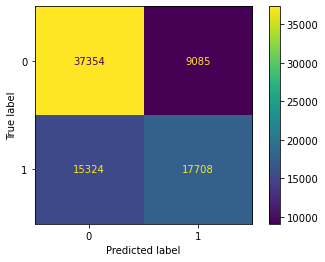

In [12]:
plot_confusion_matrix(logit, X_test, y_test)
plt.show()